In [2]:
library(corrplot)

data(iris)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


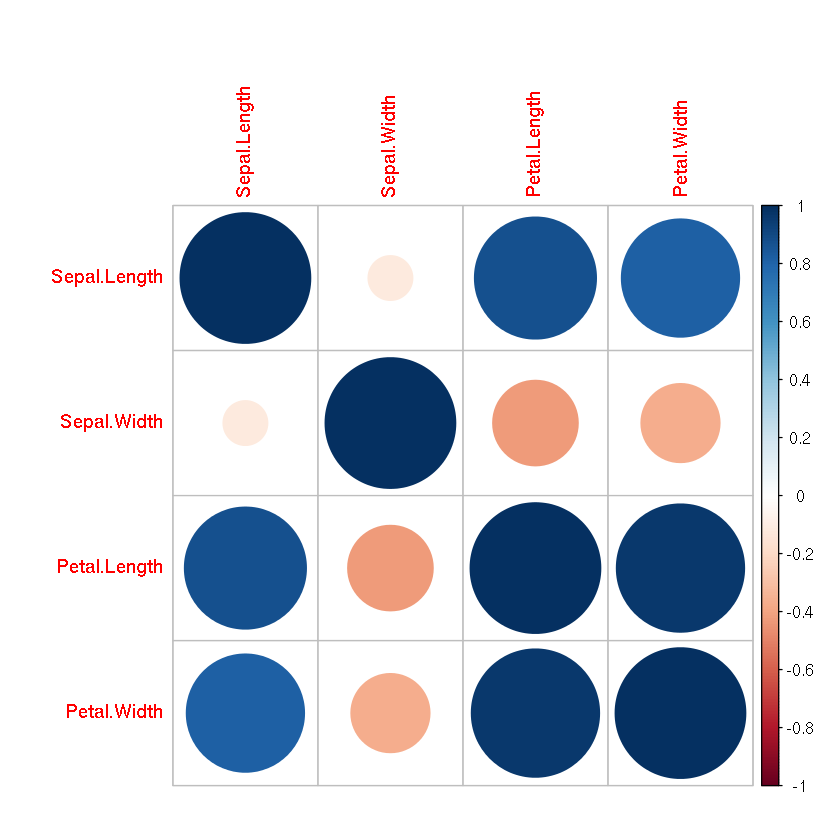

In [4]:
corrplot(cor(iris[,1:4]))

[1] 681.3706


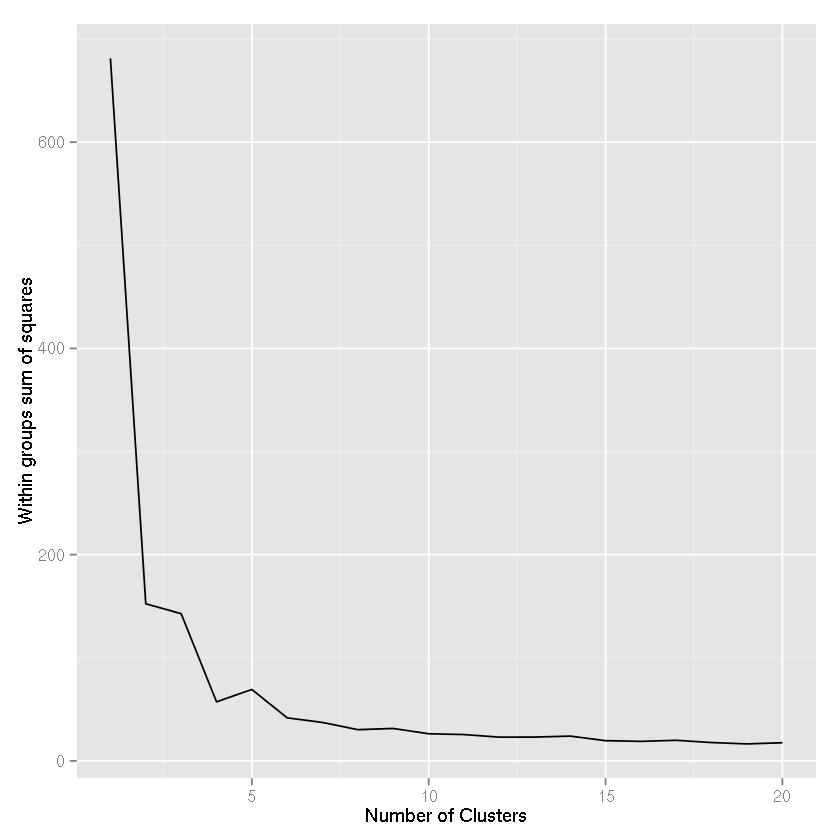

In [6]:
library(ggplot2)

X <- iris[,1:4]
wss <- (nrow(X)-1)*sum(apply(X,2,var))
print (wss)

for (i in 2:20) {
    wss[i] <- sum(kmeans(X, centers=i, iter.max=100)$withinss)
}

wss.df <- (data.frame(n=1:20, wss=wss))

ggplot(wss.df, aes(n, wss)) + geom_line() + 
    xlab("Number of Clusters") + ylab("Within groups sum of squares")


In [9]:
km <- kmeans(X, centers = 7, iter.max = 100)
km

K-means clustering with 7 clusters of sizes 28, 21, 5, 7, 17, 40, 32

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.532143    2.635714     3.960714   1.2285714
2     5.147619    3.542857     1.509524   0.2809524
3     4.400000    2.880000     1.280000   0.2000000
4     5.528571    4.042857     1.471429   0.2857143
5     4.794118    3.194118     1.452941   0.2000000
6     6.252500    2.855000     4.815000   1.6250000
7     6.912500    3.100000     5.846875   2.1312500

Clustering vector:
  [1] 2 5 5 5 2 4 5 2 3 5 2 5 5 3 4 4 4 2 4 2 2 2 5 2 5 5 2 2 2 5 5 2 4 4 5 5 2
 [38] 2 3 2 2 3 3 2 2 5 2 5 2 5 6 6 6 1 6 1 6 1 6 1 1 1 1 6 1 6 1 1 6 1 6 1 6 6
 [75] 6 6 6 6 6 1 1 1 1 6 1 6 6 6 1 1 1 6 1 1 1 1 1 6 1 1 7 6 7 7 7 7 1 7 7 7 6
[112] 6 7 6 6 7 7 7 7 6 7 6 7 6 7 7 6 6 7 7 7 7 7 6 6 7 7 7 6 7 7 7 6 7 7 7 6 6
[149] 7 6

Within cluster sum of squares by cluster:
[1]  9.7492857  1.7142857  0.5560000  0.8342857  1.4611765 13.6247500 18.7034375
 (between_SS / total_SS =

In [10]:
table(km$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         27         1
  2     21          0         0
  3      5          0         0
  4      7          0         0
  5     17          0         0
  6      0         23        17
  7      0          0        32